<a href="https://colab.research.google.com/github/KalidaCh/Data-Warehouse-and-Big-Data-Analytics/blob/main/Project_2_Analyzing_data_from_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

** Due Date: Due Date: Sunday, October 16 **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/library/view/hands-on-recommendation-systems/9781788993753/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [ ]:
from IPython.lib.display import YouTubeVideo

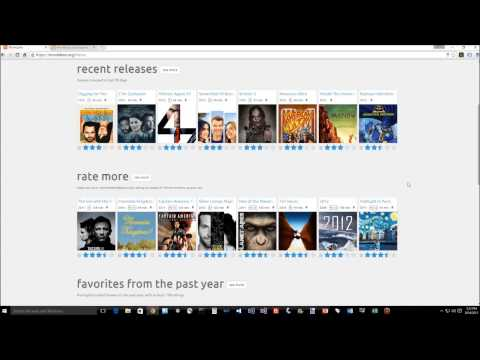

In [ ]:
YouTubeVideo('4tW9HY0Q460')

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:** 
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1: 

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See 
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See 
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import time
import numpy as np
import random
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
unames=['UserID','Gender','Age','Occupation','Zip-code']
data_users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project2/users.dat', sep='\::', header=None, names=unames)
data_users.to_csv ('users.csv', index=None)
data_users

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
rnames=['UserID','MovieID','Rating','Timestamp']
data_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project2/ratings.dat', sep='\::', header=None, names=rnames)
data_ratings.to_csv ('ratings.csv', index=None)
data_ratings

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
mnames=['MovieID','Title','Genres']
data_movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project2/movies.dat',sep='\::' ,header=None, names=mnames,encoding='iso-8859-1 ')
data_movies.to_csv ('movies.csv', index=None)
data_movies

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
data = pd.merge(pd.merge(data_ratings,data_movies),data_users)

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data.insert(4,"Year",data.Timestamp.map(lambda x: x.year),allow_duplicates=True)
data.insert(4,"Month",data.Timestamp.map(lambda x: x.month),allow_duplicates=True)

In [ ]:
data.loc[data['Age'] ==1, 'Age Group'] = 'Under 18'
data.loc[data['Age'] ==18, 'Age Group'] = '18-24'
data.loc[data['Age'] ==25, 'Age Group'] = '25-34'
data.loc[data['Age']==35, 'Age Group'] = '35-44'
data.loc[data['Age'] ==45, 'Age Group'] = '45-49'
data.loc[data['Age'] ==50, 'Age Group'] = '50-55'
data.loc[data['Age']==56, 'Age Group'] = '56+'

In [ ]:
data.loc[data['Occupation'] ==0, 'Occupation'] = 'other'
data.loc[data['Occupation'] ==1, 'Occupation'] = 'academic/educator'
data.loc[data['Occupation'] ==2, 'Occupation'] = 'artist'
data.loc[data['Occupation'] ==3, 'Occupation'] = 'clerical/admin'
data.loc[data['Occupation'] ==4, 'Occupation'] = 'college/grad student'
data.loc[data['Occupation'] ==5, 'Occupation'] = 'customer service'
data.loc[data['Occupation'] ==6, 'Occupation'] = 'doctor/health care'
data.loc[data['Occupation'] ==7, 'Occupation'] = 'executive/managerial'
data.loc[data['Occupation'] ==8, 'Occupation'] = 'farmer'
data.loc[data['Occupation'] ==9, 'Occupation'] = 'homemaker'
data.loc[data['Occupation'] ==10, 'Occupation'] = 'K-12 student'
data.loc[data['Occupation'] ==11, 'Occupation'] = 'lawyer'
data.loc[data['Occupation'] ==12, 'Occupation'] = 'programmer'
data.loc[data['Occupation'] ==13, 'Occupation'] = 'retired'
data.loc[data['Occupation'] ==14, 'Occupation'] = 'sales/marketing'
data.loc[data['Occupation'] ==15, 'Occupation'] = 'scientist'
data.loc[data['Occupation'] ==16, 'Occupation'] = 'self-employed'
data.loc[data['Occupation'] ==17, 'Occupation'] = 'technician/engineer'
data.loc[data['Occupation'] ==18, 'Occupation'] = 'tradesman/craftsman'
data.loc[data['Occupation'] ==19, 'Occupation'] = 'unemployed'
data.loc[data['Occupation'] ==20, 'Occupation'] = 'writer'

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Project2/mydata.csv')
mydata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project2/mydata.csv')
mydata.drop('Unnamed: 0',axis=1,inplace=True)
mydata

,UserID,MovieID,Rating,Timestamp,Month,Year,Title,Genres,Gender,Age,Occupation,Zip-code,Age Group
0,1,1193,5,2000-12-31 22:12:40,12,2000,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,K-12 student,48067,Under 18
1,1,661,3,2000-12-31 22:35:09,12,2000,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,K-12 student,48067,Under 18
2,1,914,3,2000-12-31 22:32:48,12,2000,My Fair Lady (1964),Musical|Romance,F,1,K-12 student,48067,Under 18
3,1,3408,4,2000-12-31 22:04:35,12,2000,Erin Brockovich (2000),Drama,F,1,K-12 student,48067,Under 18
4,1,2355,5,2001-01-06 23:38:11,1,2001,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,K-12 student,48067,Under 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,2000-08-03 16:11:15,8,2000,Footloose (1984),Drama,M,45,customer service,77662,45-49
1000205,4211,3806,3,2000-08-03 16:12:18,8,2000,MacKenna's Gold (1969),Western,M,45,customer service,77662,45-49
1000206,4211,3840,4,2000-08-03 16:13:17,8,2000,Pumpkinhead (1988),Horror,M,45,customer service,77662,45-49
1000207,4211,3766,2,2000-08-03 16:12:18,8,2000,Missing in Action (1984),Action|War,M,45,customer service,77662,45-49


In [ ]:
data.to_hdf('data.h5', key='mydata', mode='w') 

In [ ]:
data = pd.read_hdf('data.h5', 'mydata') 

## Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

### 1. How many movies have an average rating over 4.5 overall?

In [ ]:
data.dropna(subset=['MovieID','Title','Genres'],inplace = True) # 2 columnนี้จะไม่มี missingแน่นอน แนวแถว 
data.fillna(value={'Rating':data['Rating'].mean()},inplace = True) # แทนค่า missing ของ  'Rating' ด้วย ค่าเฉลี่ย


In [ ]:
rate_mean= data.groupby(['MovieID','Title','Genres'])[['Rating']].mean().reset_index()
rate_mean


,MovieID,Title,Genres,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,4.146846
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3.201141
2,3,Grumpier Old Men (1995),Comedy|Romance,3.016736
3,4,Waiting to Exhale (1995),Comedy|Drama,2.729412
4,5,Father of the Bride Part II (1995),Comedy,3.006757
...,...,...,...,...
3701,3948,Meet the Parents (2000),Comedy,3.635731
3702,3949,Requiem for a Dream (2000),Drama,4.115132
3703,3950,Tigerland (2000),Drama,3.666667
3704,3951,Two Family House (2000),Drama,3.900000


In [ ]:
ALL = rate_mean[rate_mean['Rating']>4.5]
ALL

,MovieID,Title,Genres,Rating
49,50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106
51,53,Lamerica (1994),Drama,4.750000
309,318,"Shawshank Redemption, The (1994)",Drama,4.554558
513,527,Schindler's List (1993),Drama|War,4.510417
708,745,"Close Shave, A (1995)",Animation|Comedy|Thriller,4.520548
744,787,"Gate of Heavenly Peace, The (1995)",Documentary,5.000000
802,858,"Godfather, The (1972)",Action|Crime|Drama,4.524966
926,989,Schlafes Bruder (Brother of Sleep) (1995),Drama,5.000000
1066,1148,"Wrong Trousers, The (1993)",Animation|Comedy,4.507937
1652,1830,Follow the Bitch (1998),Comedy,5.000000


In [ ]:
print("Number of movies have an average rating over 4.5 : ",len(ALL))

Number of movies have an average rating over 4.5 :  21


### 2. How many movies have an average rating over 4.5 among men? How about women?

In [ ]:
rate_= data.groupby(['MovieID','Title','Genres','Gender'])[['Rating']].mean().reset_index()
rate_

,MovieID,Title,Genres,Gender,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,F,4.187817
1,1,Toy Story (1995),Animation|Children's|Comedy,M,4.130552
2,2,Jumanji (1995),Adventure|Children's|Fantasy,F,3.278409
3,2,Jumanji (1995),Adventure|Children's|Fantasy,M,3.175238
4,3,Grumpier Old Men (1995),Comedy|Romance,F,3.073529
...,...,...,...,...,...
7147,3950,Tigerland (2000),Drama,M,3.681818
7148,3951,Two Family House (2000),Drama,F,3.705882
7149,3951,Two Family House (2000),Drama,M,4.043478
7150,3952,"Contender, The (2000)",Drama|Thriller,F,3.761905


In [ ]:
M = rate_[(rate_['Rating']>4.5) & (rate_['Gender'] == 'M') ]
M

,MovieID,Title,Genres,Gender,Rating
98,50,"Usual Suspects, The (1995)",Crime|Thriller,M,4.518248
102,53,Lamerica (1994),Drama,M,4.666667
249,130,Angela (1995),Drama,M,5.000000
610,318,"Shawshank Redemption, The (1994)",Drama,M,4.560625
837,439,Dangerous Game (1993),Drama,M,5.000000
1144,598,Window to Paris (1994),Comedy,M,4.666667
1435,787,"Gate of Heavenly Peace, The (1995)",Documentary,M,5.000000
1539,858,"Godfather, The (1972)",Action|Crime|Drama,M,4.583333
1767,985,Small Wonders (1996),Documentary,M,5.000000
1774,989,Schlafes Bruder (Brother of Sleep) (1995),Drama,M,5.000000


In [ ]:
F = rate_[(rate_['Rating']>4.5) & (rate_['Gender'] == 'F') ]
F

,MovieID,Title,Genres,Gender,Rating
97,50,"Usual Suspects, The (1995)",Crime|Thriller,F,4.513317
101,53,Lamerica (1994),Drama,F,5.000000
410,214,Before the Rain (Pred dozhdot) (1994),Drama,F,4.600000
568,297,Panther (1995),Drama,F,4.666667
609,318,"Shawshank Redemption, The (1994)",Drama,F,4.539075
758,394,Coldblooded (1995),Action,F,5.000000
1012,527,Schindler's List (1993),Drama|War,F,4.562602
1177,617,"Flower of My Secret, The (La Flor de Mi Secret...",Drama,F,4.600000
1255,668,Pather Panchali (1955),Drama,F,4.571429
1257,669,Aparajito (1956),Drama,F,4.666667


In [ ]:
print("Number of movies have an rating over 4.5 among men:",len(M))
print("Number of movies have an rating over 4.5 among women:",len(F))

Number of movies have an rating over 4.5 among men: 23
Number of movies have an rating over 4.5 among women: 51


### 3. How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?

In [ ]:
rate= data.groupby(['MovieID','Title','Genres','Gender','Age'])[['Rating']].mean().reset_index()
rate

,MovieID,Title,Genres,Gender,Age,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,F,1,4.076923
1,1,Toy Story (1995),Animation|Children's|Comedy,F,18,4.086614
2,1,Toy Story (1995),Animation|Children's|Comedy,F,25,4.325123
3,1,Toy Story (1995),Animation|Children's|Comedy,F,35,4.232558
4,1,Toy Story (1995),Animation|Children's|Comedy,F,45,3.916667
...,...,...,...,...,...,...
40041,3952,"Contender, The (2000)",Drama|Thriller,M,25,3.766355
40042,3952,"Contender, The (2000)",Drama|Thriller,M,35,3.781818
40043,3952,"Contender, The (2000)",Drama|Thriller,M,45,4.000000
40044,3952,"Contender, The (2000)",Drama|Thriller,M,50,3.933333


In [ ]:
MA = rate[(rate['Rating']>4.5) & (rate['Gender'] == 'M') & (rate['Age'] > 30)]
MA

,MovieID,Title,Genres,Gender,Age,Rating
651,53,Lamerica (1994),Drama,M,35,5.000000
653,53,Lamerica (1994),Drama,M,50,5.000000
979,84,Last Summer in the Hamptons (1995),Comedy|Drama,M,45,5.000000
1098,96,In the Bleak Midwinter (1995),Comedy,M,35,5.000000
1402,128,Jupiter's Wife (1994),Documentary,M,35,5.000000
...,...,...,...,...,...,...
39461,3897,Almost Famous (2000),Comedy|Drama,M,50,4.578947
39534,3906,Under Suspicion (2000),Crime,M,56,5.000000
39696,3920,"Faraway, So Close (In Weiter Ferne, So Nah!) (...",Drama|Fantasy,M,56,5.000000
39758,3925,Stranger Than Paradise (1984),Comedy,M,56,4.600000


In [ ]:
FA = rate[(rate['Rating']>4.5) & (rate['Gender'] == 'F') & (rate['Age'] > 30)]
FA

,MovieID,Title,Genres,Gender,Age,Rating
170,13,Balto (1995),Animation|Children's,F,45,5.000000
184,14,Nixon (1995),Drama,F,56,5.000000
196,15,Cutthroat Island (1995),Action|Adventure|Romance,F,50,5.000000
463,37,Across the Sea of Time (1995),Documentary,F,50,5.000000
470,38,It Takes Two (1995),Comedy,F,50,5.000000
...,...,...,...,...,...,...
39687,3920,"Faraway, So Close (In Weiter Ferne, So Nah!) (...",Drama|Fantasy,F,35,5.000000
39688,3920,"Faraway, So Close (In Weiter Ferne, So Nah!) (...",Drama|Fantasy,F,50,5.000000
39749,3925,Stranger Than Paradise (1984),Comedy,F,45,4.666667
39751,3925,Stranger Than Paradise (1984),Comedy,F,56,5.000000


In [ ]:
print("Number of movies have an median rating over 4.5 among men over age 30: ",len(MA))
print("Number of movies have an median rating over 4.5 among women over age 30: ",len(FA))

Number of movies have an median rating over 4.5 among men over age 30:  274
Number of movies have an median rating over 4.5 among women over age 30:  525


### What are the ten most popular movies?
- Choose what you consider to be a reasonable defintion of "popular".
- Be perpared to defend this choice.

In [ ]:
#นับจำนวนครั้งในการเข้าดูหนัง
moviecount=pd.DataFrame(data.groupby(['MovieID','Title']).size())
moviecount['Count'] = moviecount
del moviecount[0]
moviecount.reset_index(inplace=True)
moviecount.sort_values('Count',ascending= False, inplace=True) 
moviecount.head(10)

,MovieID,Title,Count
2651,2858,American Beauty (1999),3428
253,260,Star Wars: Episode IV - A New Hope (1977),2991
1106,1196,Star Wars: Episode V - The Empire Strikes Back...,2990
1120,1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
466,480,Jurassic Park (1993),2672
1848,2028,Saving Private Ryan (1998),2653
575,589,Terminator 2: Judgment Day (1991),2649
2374,2571,"Matrix, The (1999)",2590
1178,1270,Back to the Future (1985),2583
579,593,"Silence of the Lambs, The (1991)",2578


### 5. Make some conjectures about how easy various groups are to please? Support your answers with data!
- For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children. This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
- Be sure to come up with your own conjectures and support them with data!

#### Conjecture : ช่วงอายุ ต่ำกว่า 18  จะมีการให้คะแนน ที่ง่ายกว่าช่วงอายุอื่นเนื่องจากยังเด็กอยู่

In [ ]:
df=pd.DataFrame(data.groupby(['Genres','Title','Age Group']).size())
df['Count'] = df
del df[0]
df.reset_index(level=['Title','Genres','Age Group'], inplace=True)

In [ ]:
df=pd.DataFrame(data.groupby(['Age Group'])['Rating'].mean())
df.reset_index()

,Age Group,Rating
0,18-24,3.507573
1,25-34,3.545235
2,35-44,3.618162
3,45-49,3.638062
4,50-55,3.714512
5,56+,3.766632
6,Under 18,3.549520


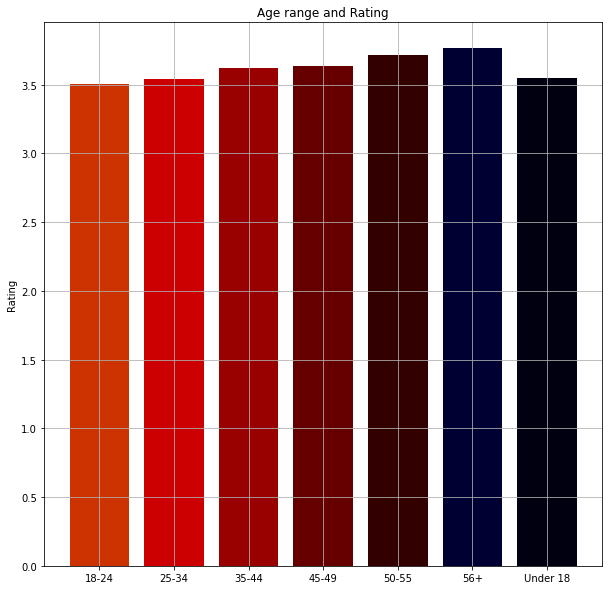

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize']=[10,10]
plt.bar([1,2,3,4,5,6,7],df['Rating'],color=['#CC3300', '#CC0000', '#990000','#660000','#330000','#000033','#000011']) 
plt.xticks([1,2,3,4,5,6,7], df.reset_index()['Age Group'])
plt.xticks([1,2,3,4,5,6,7], ['18-24','25-34','35-44','45-49','50-55','56+','Under 18'])


plt.title('Age range and Rating')
plt.grid(True)
plt.ylabel('Rating');

# Problem 2: Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

### 1.Plot a histogram of the ratings of all movies.

In [ ]:
data

,UserID,MovieID,Rating,Timestamp,Month,Year,Title,Genres,Gender,Age,Occupation,Zip-code,Age Group
0,1,1193,5,2000-12-31 22:12:40,12,2000,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,K-12 student,48067,Under 18
1,1,661,3,2000-12-31 22:35:09,12,2000,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,K-12 student,48067,Under 18
2,1,914,3,2000-12-31 22:32:48,12,2000,My Fair Lady (1964),Musical|Romance,F,1,K-12 student,48067,Under 18
3,1,3408,4,2000-12-31 22:04:35,12,2000,Erin Brockovich (2000),Drama,F,1,K-12 student,48067,Under 18
4,1,2355,5,2001-01-06 23:38:11,1,2001,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,K-12 student,48067,Under 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,2000-08-03 16:11:15,8,2000,Footloose (1984),Drama,M,45,customer service,77662,45-49
1000205,4211,3806,3,2000-08-03 16:12:18,8,2000,MacKenna's Gold (1969),Western,M,45,customer service,77662,45-49
1000206,4211,3840,4,2000-08-03 16:13:17,8,2000,Pumpkinhead (1988),Horror,M,45,customer service,77662,45-49
1000207,4211,3766,2,2000-08-03 16:12:18,8,2000,Missing in Action (1984),Action|War,M,45,customer service,77662,45-49


In [ ]:
data.MovieID.unique()

array([1193,  661,  914, ...,  402,  872,  684])

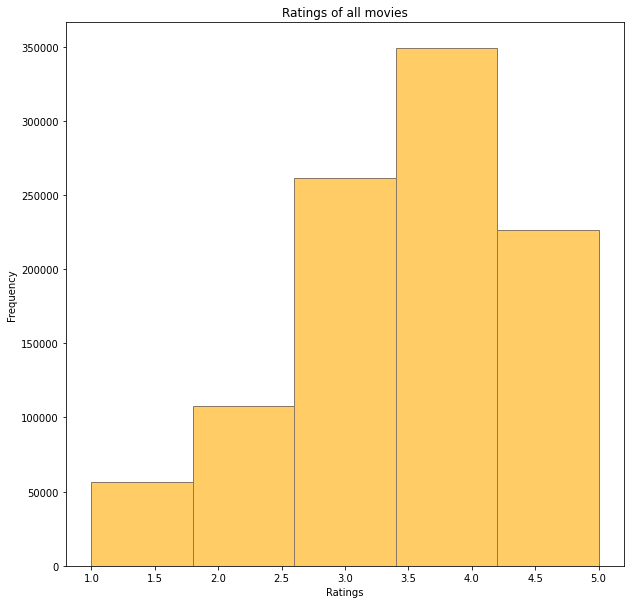

In [ ]:
plt.title("Ratings of all movies")
e = plt.hist(data.Rating,rwidth=30,ec="#8B7765", fc="#FFCC66",bins = 5)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()


In [ ]:
e

(array([ 56174., 107557., 261197., 348971., 226310.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

### 2. Plot a histogram of the number of ratings each movie recieved.

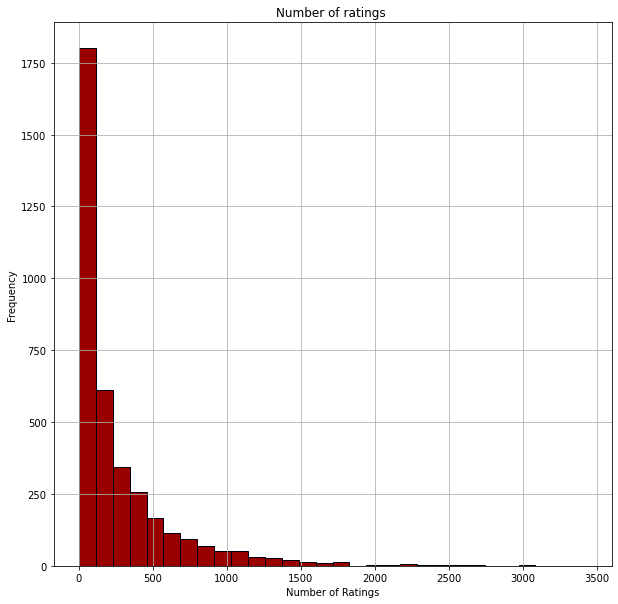

In [ ]:
Rating_each=data.pivot_table('Rating',index='Title',aggfunc='count')
Rating_each.hist(rwidth=30,ec="#000011", fc="#990000",bins=30)
plt.title('Number of ratings ')
plt.ylabel('Frequency')
plt.xlabel('Number of Ratings');

### 3. Plot a histogram of the average rating for each movie.

Text(0.5, 1.0, 'Avg Rating')

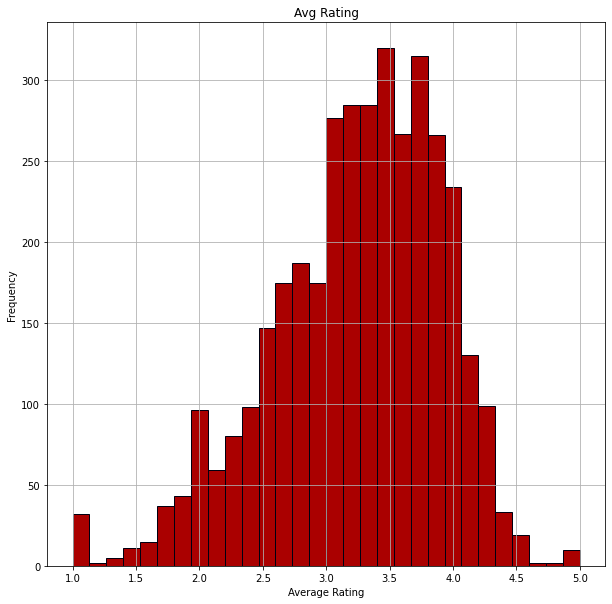

In [ ]:
#Plot a histogram of the average rating for each movie.
avg_Rating_Movies = data.pivot_table('Rating',index='Title',aggfunc='mean')
avg_Rating_Movies.hist(ec="#000011", fc="#AA0000",bins = 30)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title("Avg Rating")

### 4.Plot a histogram of the average rating for movies which are rated more than 100 times.
- What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
- Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?

Text(0.5, 0, 'Average Rating')

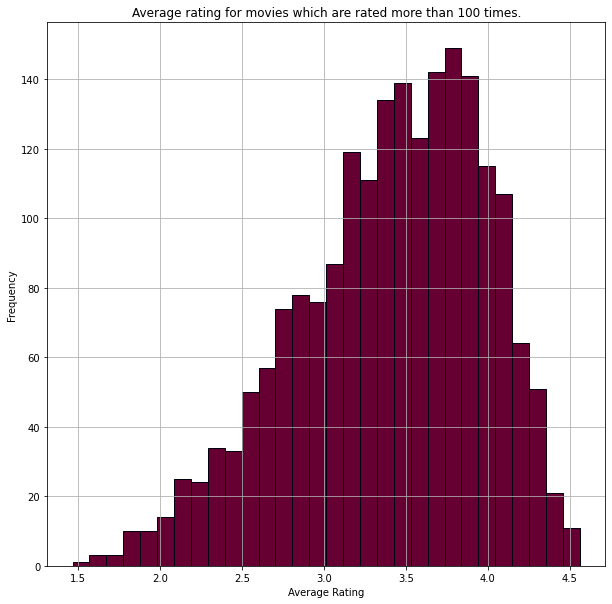

In [ ]:
#Plot a histogram of the average rating for movies which are rated more than 100 times
rating_by_title = data.groupby('Title').size()  # .size()  = Number of elements in the array.
active_titles = rating_by_title.index[rating_by_title > 100]  # เอาชื่อหนังที่มีการให้คะเเนนมากกว่า 100 ครั้งขึ้นไป  ใส่index เพราะว่าจะเอาเเค่ชื่อหนัง
avg_ratings_each_active = avg_Rating_Movies.loc[active_titles]   # avg_Rating_Movies คะแนนเฉลี่ยของหนังทั้งหมด . loc [เอาเเค่ตามนี้]
avg_ratings_each_active.hist(ec="#000011", fc="#660033",bins = 30)
plt.title('Average rating for movies which are rated more than 100 times.')
plt.ylabel('Frequency')
plt.xlabel('Average Rating')

Text(0.5, 0, 'Average Rating')

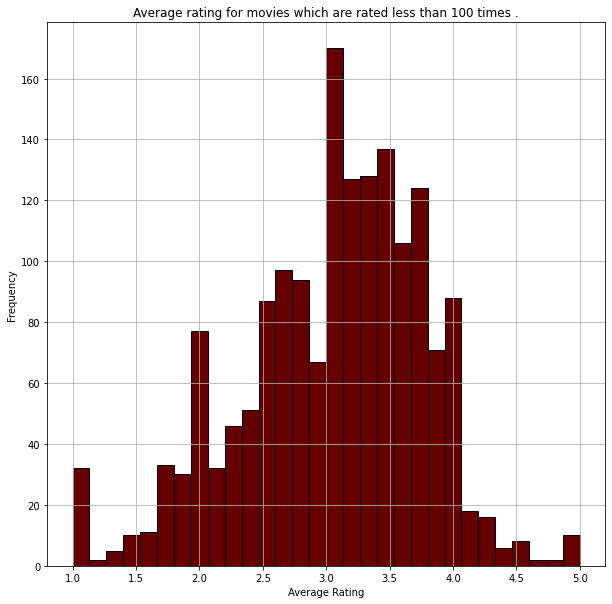

In [ ]:
rating_by_title = data.groupby('Title').size()  # .size()  = Number of elements in the array.
active_titles = rating_by_title.index[rating_by_title < 100]  # เอาชื่อหนังที่มีการให้คะเเนนมากกว่า 100 ครั้งขึ้นไป  ใส่index เพราะว่าจะเอาเเค่ชื่อหนัง
avg_ratings_each_active = avg_Rating_Movies.loc[active_titles]   # avg_Rating_Movies คะแนนเฉลี่ยของหนังทั้งหมด . loc [เอาเเค่ตามนี้]
avg_ratings_each_active.hist(ec="#000011", fc="#660000",bins = 30)
plt.title('Average rating for movies which are rated less than 100 times .')
plt.ylabel('Frequency')
plt.xlabel('Average Rating')

In [ ]:
rate_mean= data.groupby(['MovieID','Title','Genres'])[['Rating']].mean().reset_index()
rate_mean

,MovieID,Title,Genres,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,4.146846
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3.201141
2,3,Grumpier Old Men (1995),Comedy|Romance,3.016736
3,4,Waiting to Exhale (1995),Comedy|Drama,2.729412
4,5,Father of the Bride Part II (1995),Comedy,3.006757
...,...,...,...,...
3701,3948,Meet the Parents (2000),Comedy,3.635731
3702,3949,Requiem for a Dream (2000),Drama,4.115132
3703,3950,Tigerland (2000),Drama,3.666667
3704,3951,Two Family House (2000),Drama,3.900000


### 5. Make some conjectures about the distribution of ratings? Support your answers with data!
- For example, what age range do you think has more extreme ratings? Do you think children are more or less likely to rate a movie 1 or 5?
- Be sure to come up with your own conjectures and support them with data!

#### Conjecture 1.ผู้หญิงและผู้ชายจะมีจำนวนครั้งในการให้คะแนนใกล้เคียงกัน

In [ ]:
#ผู้หญิงและผู้ชายจะมีจำนวนครั้งในการให้คะแนนใกล้เคียงกันหรือไม่
rating_gender = data.pivot_table('Title',index='Gender',aggfunc='count').reset_index()#ดูจำนวนครั้งการให้คะแนนของผู้ชายและผู้หญิง
rating_gender

,Gender,Title
0,F,246440
1,M,753769


Text(0.5, 0, 'Gender')

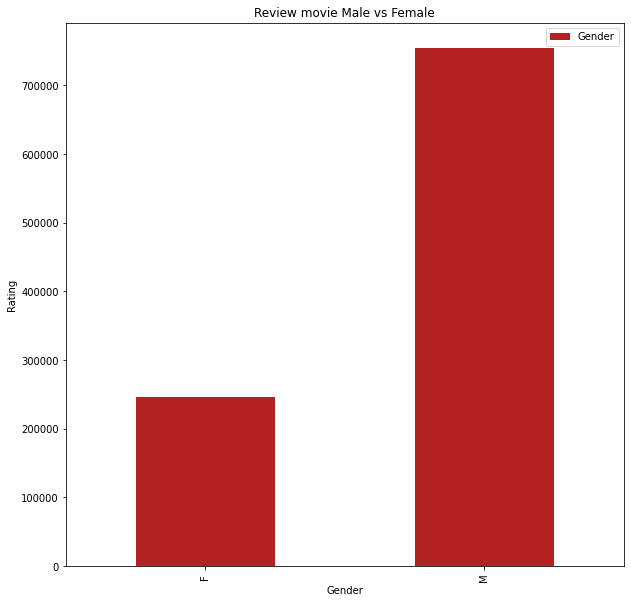

In [ ]:
matplotlib.rcParams['figure.figsize']=[10,10]#กำหนดขนาดกราฟ
rating_gender.plot(kind='bar',color=['Firebrick'],title='Review movie Male vs Female')#กำหนดชนิดกราฟ สี ชื่อกราฟ
plt.xticks([0,1],['Female','male'],rotation=20) #กำหนดชื่อแท่งกราฟ หมุนชื่อแกนx 20องศา
plt.legend(labels=['Gender'])
plt.ylabel('Rating')
plt.xlabel('Gender')
#False?

In [ ]:
##ดูจำนวนครั้งของแต่ละRatingที่ผู้ชายและผู้หญิงให้
C = data.pivot_table('Title',index='Gender',columns='Rating',aggfunc='count').reset_index()
C


Rating,Gender,1,2,3,4,5
0,F,13347,24548,62966,87033,58546
1,M,42827,83009,198231,261938,167764


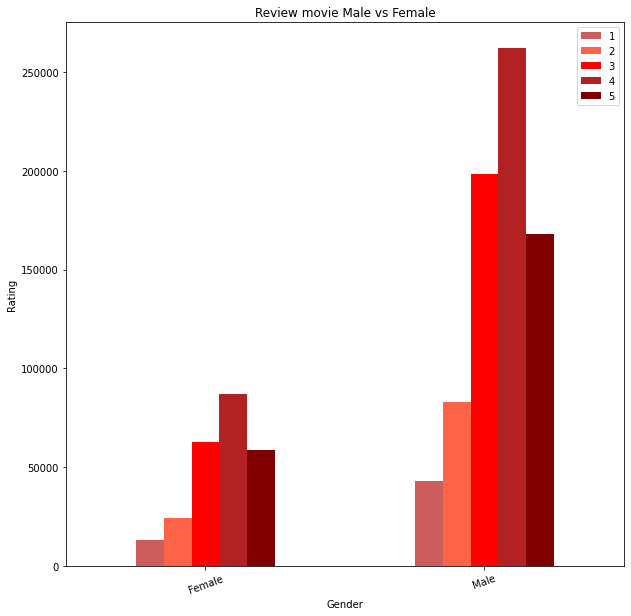

In [ ]:
#เปรียบเทียบด้วยกราฟ
C.plot(kind='bar',color=['IndianRed','Tomato','red','Firebrick','Maroon'],title='Review movie Male vs Female')
plt.xticks([0,1],['Female','Male'],rotation=20)
plt.legend(labels=['1','2','3','4','5'])
plt.ylabel('Rating')
plt.xlabel('Gender');

#### Conjectures 2.นักศึกษามีจำนวนการให้คะแนนมากที่สุด

In [ ]:
#ดูจำนวนครั้งการให้คะแนนโดยแยกเป็นอาชีพ
rating_oc = data.pivot_table('Title',index='Occupation',aggfunc='count').reset_index()
rating_oc.sort_values('Title',ascending = False)

,Occupation,Title
4,college/grad student,131032
11,other,130499
7,executive/managerial,105425
1,academic/educator,85351
17,technician/engineer,72816
20,writer,60397
12,programmer,57214
2,artist,50068
14,sales/marketing,49109
16,self-employed,46021


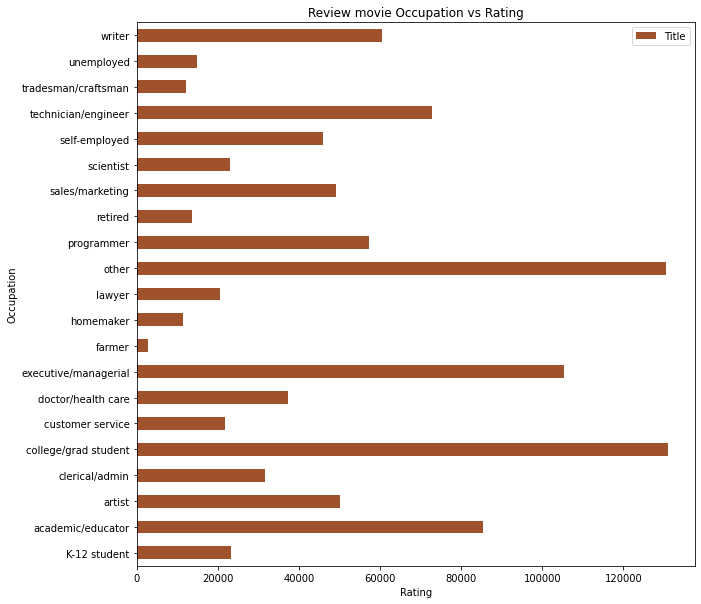

In [ ]:
matplotlib.rcParams['figure.figsize']=[10,10]
name_oc = rating_oc['Occupation']
rating_oc.plot(kind='barh',color=['Sienna'],title='Review movie Occupation vs Rating')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],name_oc)

plt.xlabel('Rating')
plt.ylabel('Occupation');

#### Conjectures 3.คนอายุช่วง 18-24 จะให้คะแนนเรทติ้งหนังประเภทดราม่ามากที่สุด

In [ ]:
Genres = data['Genres']
Genres_all = [str.split('|') for str in Genres ]
drama = ['Drama' in Genres for Genres in Genres_all]
drama_movie = pd.DataFrame(drama,index=data.index)
data['Drama'] = drama_movie
data_drama  = data.loc[data['Drama']==True]

rating_agegroup  = data.pivot_table('Rating',index='Genres',columns='Age Group',aggfunc='sum')
drama_title = data_drama.groupby('Genres').size()
drama_title =drama_title.index[drama_title>100]
ra = rating_agegroup.loc[drama_title]
ra_mean = ra.mean()
ra_mean

Age Group
18-24       2959.876712
25-34       7075.027397
35-44       3706.246575
45-49       1664.246575
50-55       1551.452055
56+          929.383562
Under 18     388.589041
dtype: float64

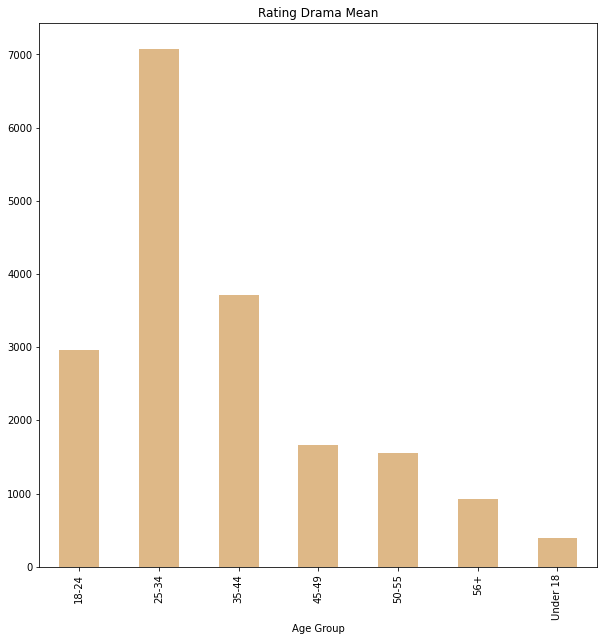

In [ ]:
ra_mean.plot(kind='bar',color=['Burlywood'], title = 'Rating Drama Mean')



# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### 1. A scatter plot of men versus women and their mean rating for every movie

In [ ]:
rate_= data.groupby(['MovieID','Title','Genres','Gender'])[['Rating']].mean().reset_index()
rate_

,MovieID,Title,Genres,Gender,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,F,4.187817
1,1,Toy Story (1995),Animation|Children's|Comedy,M,4.130552
2,2,Jumanji (1995),Adventure|Children's|Fantasy,F,3.278409
3,2,Jumanji (1995),Adventure|Children's|Fantasy,M,3.175238
4,3,Grumpier Old Men (1995),Comedy|Romance,F,3.073529
...,...,...,...,...,...
7147,3950,Tigerland (2000),Drama,M,3.681818
7148,3951,Two Family House (2000),Drama,F,3.705882
7149,3951,Two Family House (2000),Drama,M,4.043478
7150,3952,"Contender, The (2000)",Drama|Thriller,F,3.761905


In [ ]:
MG = rate_[rate_['Gender'] == 'M'][['MovieID','Gender','Rating']]
MG

,MovieID,Gender,Rating
1,1,M,4.130552
3,2,M,3.175238
5,3,M,2.994152
7,4,M,2.482353
9,5,M,2.888298
...,...,...,...
7143,3948,M,3.641838
7145,3949,M,4.174107
7147,3950,M,3.681818
7149,3951,M,4.043478


In [ ]:
FG = rate_[rate_['Gender'] == 'F'][['MovieID','Gender','Rating']]
FG

,MovieID,Gender,Rating
0,1,F,4.187817
2,2,F,3.278409
4,3,F,3.073529
6,4,F,2.976471
8,5,F,3.212963
...,...,...,...
7142,3948,F,3.619048
7144,3949,F,3.950000
7146,3950,F,3.600000
7148,3951,F,3.705882


In [ ]:
rating_gender = MG.merge(FG, left_on='MovieID', right_on='MovieID').reset_index()
rating_gender

,index,MovieID,Gender_x,Rating_x,Gender_y,Rating_y
0,0,1,M,4.130552,F,4.187817
1,1,2,M,3.175238,F,3.278409
2,2,3,M,2.994152,F,3.073529
3,3,4,M,2.482353,F,2.976471
4,4,5,M,2.888298,F,3.212963
...,...,...,...,...,...,...
3441,3441,3948,M,3.641838,F,3.619048
3442,3442,3949,M,4.174107,F,3.950000
3443,3443,3950,M,3.681818,F,3.600000
3444,3444,3951,M,4.043478,F,3.705882


In [ ]:
data.groupby('Gender').size()

Gender
F    246440
M    753769
dtype: int64

In [ ]:
x = rating_gender['Rating_x']
y = rating_gender['Rating_y']

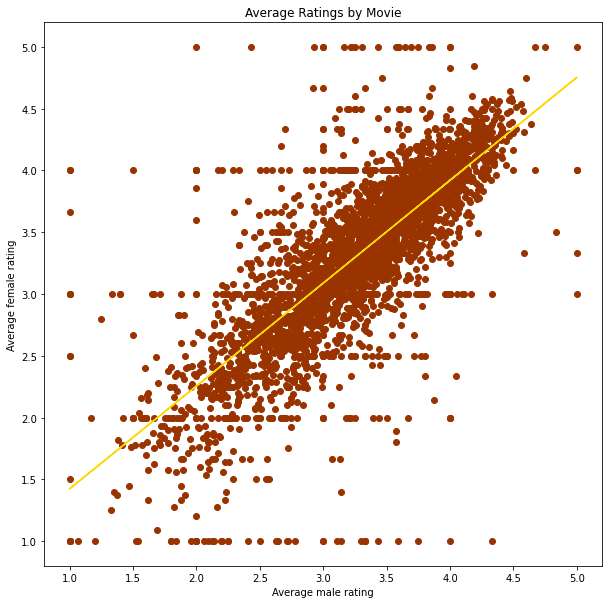

In [ ]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x,y,color='#993300')
plt.title('Average Ratings by Movie')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')
plt.plot(x, mymodel,color='gold')
plt.show()

### 2. A scatter plot of men versus women and their mean rating for movies rated more than 200 times 

In [ ]:
mean_rating = data.pivot_table('Rating',index = 'Title',columns = 'Gender',aggfunc = 'mean')
rating_title = data.groupby('Title').size()
rating_200 = rating_title.index[rating_title>200]
over_200 = mean_rating.loc[rating_200]

In [ ]:
x1 = over_200['M'] 
y1 = over_200['F'] 

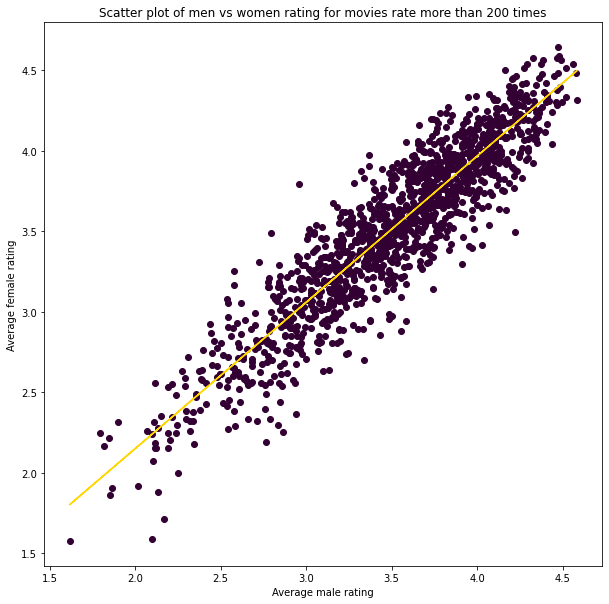

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x1, y1)
def myfunc(x1):
  return slope * x1 + intercept

mymodel = list(map(myfunc, x1))
plt.scatter(over_200['M'],over_200['F'],color='#330033')
plt.title('Scatter plot of men vs women rating for movies rate more than 200 times')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')
plt.plot(x1, mymodel,color='gold')
plt.show()


### The correlation coefficent between the ratings of men and women




In [ ]:
# correlation coefficient All
slope, intercept, r, p, std_err = stats.linregress(x,y)
print(f'Correlation coefficient between averege male and female: {r}')

Correlation coefficient between averege male and female: 0.7631898908583274


In [ ]:
# correlation coefficient 200 times
slope, intercept, r, p, std_err = stats.linregress(x1,y1)
print(f'Correlation coefficient between averege male and female: {r}')

Correlation coefficient between averege male and female: 0.9183613857026663


## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller. 

#### Conjecture 1.คะแนนเรทติ้งเฉลี่ยผู้ชายจะมากกว่าผู้หญิงเมื่อเป็นหนังประเภทAction 

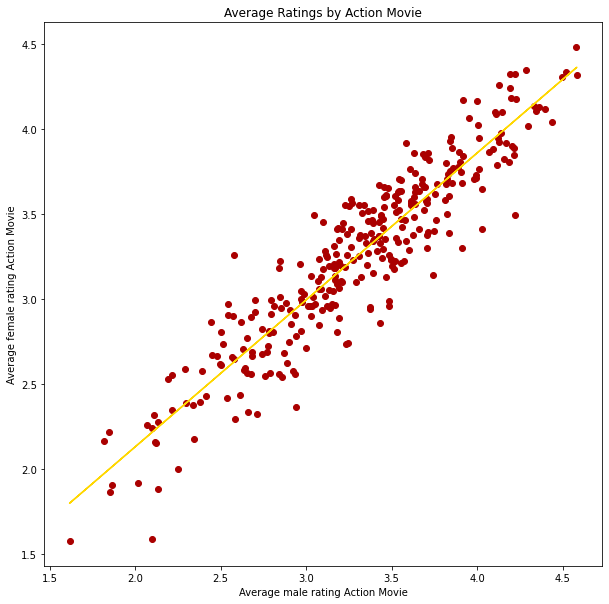

Correlation coefficient between averege male and female: 0.9283137246386539


In [ ]:
Genres = data['Genres']
Genres_all = [str.split('|') for str in Genres ]
action = ['Action' in Genres for Genres in Genres_all]
action_movie = pd.DataFrame(action,index=data.index)
data['Action'] = action_movie
data_action  = data.loc[data['Action']==True]

action_rating = data_action.pivot_table('Rating',index='Title',columns='Gender',aggfunc='mean') #ค่าเฉลี่ย ของคะเเนนหนัง action
action_title = data_action.groupby('Title').size()
action_title_200 = action_title.index[action_title>=200]
action_title_over200 = action_rating.loc[action_title_200]


x2 = action_title_over200['M'] #คะแนนเรทติ้งผู้ชายที่มีการให้คะแนนหนังหนึ่งเรื่องมากกว่า200ครั้งขึ้นไป
y2 = action_title_over200['F']

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x2, y2)
def myfunc(x2):
  return slope * x2 + intercept

mymodel = list(map(myfunc, x2))

plt.scatter(x2,y2,color='#AA0000')
plt.title('Average Ratings by Action Movie')
plt.ylabel('Average female rating Action Movie')
plt.xlabel('Average male rating Action Movie')
plt.plot(x2, mymodel,color='gold')
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x2, y2)
print(f'Correlation coefficient between averege male and female: {r}')
#อันนี้ไม่รู้ทำไปเพื่ออะไร

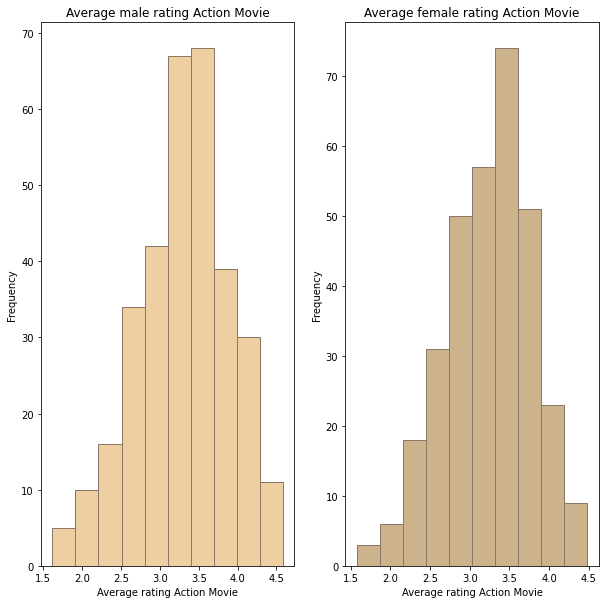

In [ ]:
matplotlib.rcParams['figure.figsize']=[10,10]
plt.subplot(1,2,1)
plt.hist(x2,ec="#8B7765", fc="#EECFA1") # m
plt.title('Average male rating Action Movie')
plt.xlabel("Average rating Action Movie")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.hist(y2,ec="#8B7765", fc="#CDB38B") # f
plt.title('Average female rating Action Movie')
plt.xlabel("Average rating Action Movie")
plt.ylabel("Frequency")
plt.show();
#plt.hist(data.Rating,rwidth=30,ec="#8B7765", fc="#FFCC66",bins = 5)
#plt.xlabel("Ratings")
#plt.ylabel("Frequency")
#plt.show()

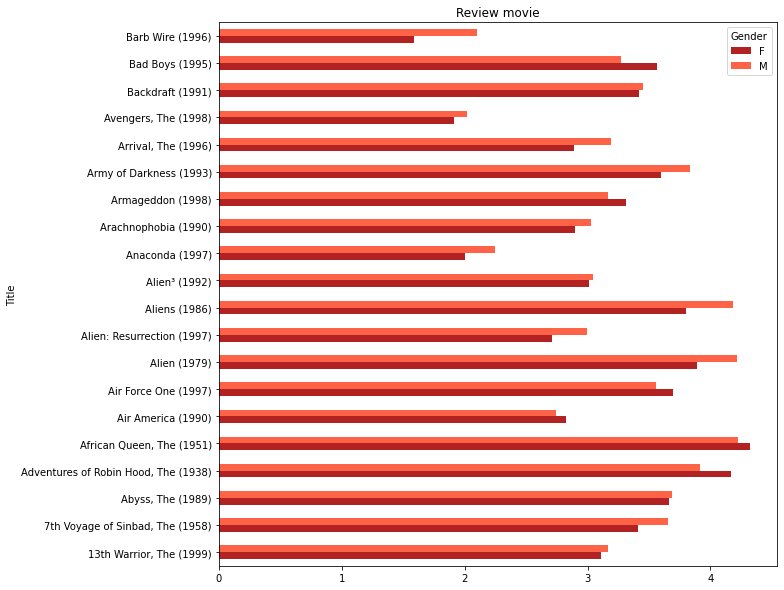

In [ ]:
action_title_over200 [:20].plot(kind='barh',color=['Firebrick','Tomato'],title='Review movie'); #พล็อตกราฟดูคราวๆ

In [ ]:
action_title_over200['Difference'] = action_title_over200['M'] - action_title_over200['F'] 
sorted_aa = action_title_over200.sort_values(by='Difference')
print(len(sorted_aa[sorted_aa['Difference']>0]))#จำนวนหนังที่มีการให้คะแนนเรทติ้งของผู้ชายมากกว่าผู้หญิง
print(len(sorted_aa[sorted_aa['Difference']<0]))#จำนวนหนังที่มีการให้คะแนนเรทติ้งของผู้หญิงมากกว่าผู้ชาย
sorted_aa

183
139


Gender,F,M,Difference
Title,,,
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
"Jewel of the Nile, The (1985)",3.494253,3.048096,-0.446157
Iron Eagle (1986),2.968750,2.543933,-0.424817
Beverly Hills Cop III (1994),2.865385,2.443333,-0.422051
Timecop (1994),3.220000,2.847150,-0.372850
...,...,...,...
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985


#### Conjecture 2. คะแนนเรทติ้งเฉลี่ยของผู้ชายและผู้หญิงโดยดูจากประเภทของหนังทั้งหมดจะมีความใกล้เคียงกัน

In [ ]:
#data['Genres_list'] = data['Genres'].str.split('|') #ไม่เกี่ยว
mean_genres = data.pivot_table('Rating',index='Genres',columns='Gender',aggfunc='mean')
mean_genres.sort_values(by='F')
mean_genres['Difference'] = mean_genres['M'] - mean_genres['F'] 

asc = mean_genres.sort_values(by='Difference')
dsc = mean_genres.sort_values(by='Difference',ascending=False)
zero = mean_genres[mean_genres['Difference']==0]

In [ ]:
mean_genres.head()

Gender,F,M,Difference
Genres,,,
Action,3.367474,3.352991,-0.014483
Action|Adventure,3.701213,3.671115,-0.030099
Action|Adventure|Animation,3.843750,4.217082,0.373332
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638,-0.635703
Action|Adventure|Animation|Horror|Sci-Fi,3.422535,3.563071,0.140536


In [ ]:
asc.head()

Gender,F,M,Difference
Genres,,,
Children's|Drama|Fantasy,3.538462,2.756410,-0.782051
Action|Comedy|Romance|Thriller,3.254717,2.578358,-0.676359
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638,-0.635703
Children's|Musical,3.859504,3.286325,-0.573179
Children's|Fantasy,3.090909,2.562500,-0.528409


In [ ]:
dsc.head()

Gender,F,M,Difference
Genres,,,
Comedy|Film-Noir|Thriller,1.000000,2.250000,1.250000
Crime|Mystery,2.687500,3.360656,0.673156
Action|Adventure|Comedy|Horror,3.297297,3.909283,0.611985
Action|Western,3.541667,4.144167,0.602500
Action|Animation|Children's|Sci-Fi|Thriller|War,2.857143,3.433333,0.576190


In [ ]:
zero

Gender,F,M,Difference
Genres,,,
Film-Noir|Horror,4.0,4.0,0.0


#### Conjecture 3.คะแนนเรทติ้งเฉลี่ยของผู้หญิงและผู้ชายโดยดูจากอาชีพจะมีความใกล้เคียงกัน

In [ ]:
mean_occupation = data.pivot_table('Rating',index='Occupation',columns='Gender',aggfunc='mean')
mean_occupation['Difference'] = mean_occupation['F'] - mean_occupation['M']
sorted_mean_occupation = mean_occupation.sort_values(by='Difference')

In [ ]:
sorted_mean_occupation

Gender,F,M,Difference
Occupation,,,
farmer,3.363208,3.498551,-0.135343
sales/marketing,3.583702,3.629714,-0.046013
writer,3.467402,3.507918,-0.040517
artist,3.555888,3.581192,-0.025304
academic/educator,3.584606,3.571737,0.012869
college/grad student,3.547252,3.533348,0.013905
programmer,3.677102,3.650883,0.026219
technician/engineer,3.649366,3.609373,0.039993
unemployed,3.445724,3.404427,0.041298


#### Conjecture 4.คะแนนเรทติ้งเฉลี่ยของผู้หญิงและผู้ชายโดยดูจากช่วงอายุจะมีความใกล้เคียงกัน

In [ ]:
mean_agegroup = data.pivot_table('Rating',index=['Age Group'],columns='Gender',aggfunc='mean')
mean_agegroup.fillna(0)

Gender,F,M
Age Group,,
18-24,3.453145,3.525476
25-34,3.606700,3.526780
35-44,3.659653,3.604434
45-49,3.663044,3.627942
50-55,3.797110,3.687098
56+,3.915534,3.720327
Under 18,3.616291,3.517461


# Problem 4: 
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

### For example, which movie to make/buy? (seperating via Genre?)

1. ถ้ากลุ่มลูกค้าของเรา คือเด็กอายุไม่เกิน 20 ปี  เราควรทำหนังประเภทไหน
2. ตอนนี้หนังประเภทไหนกำลังเป็นที่นิยม
3. ผู้ชายนิยมหนังประเภทไหน
    3.1 หนังเรื่องไหนที่ผู้ชายนิยมดูมากที่สุด
4. ผู้หญิงนิยมหนังประเภทไหน
    4.1 หนังเรื่องไหนที่ผู้หญิงนิยมดูมากที่สุด

In [ ]:
import re     #เรียกไปแล้วด้านบน
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### 1. ถ้ากลุ่มลูกค้าของเรา คือเด็กอายุไม่เกิน 18 ปี เราควรทำหนังประเภทไหน

In [ ]:
# 1. ถ้ากลุ่มลูกค้าของเรา คือเด็กอายุไม่เกิน 18 ปี เราควรทำหนังประเภทไหน
Amoviecount=pd.DataFrame(data.groupby(['MovieID','Title','Genres','Age']).size())
Amoviecount['Count'] = Amoviecount
del Amoviecount[0]
Amoviecount.reset_index(inplace=True)
Amoviecount.sort_values('Count',ascending= False, inplace=True) 
Amoviecount

,MovieID,Title,Genres,Age,Count
16121,2858,American Beauty (1999),Comedy|Drama,25,1334
6584,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,25,1176
6682,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,25,1134
1559,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,25,1128
3561,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,25,1087
...,...,...,...,...,...
15202,2705,"Late August, Early September (Fin août, début ...",Drama,35,1
1055,178,Love & Human Remains (1993),Comedy,45,1
15200,2705,"Late August, Early September (Fin août, début ...",Drama,18,1
1052,178,Love & Human Remains (1993),Comedy,18,1


In [ ]:
Amoviecount= Amoviecount[Amoviecount['Age'] < 18]   ## 'Under 18'
Amoviecount

,MovieID,Title,Genres,Age,Count
0,1,Toy Story (1995),Animation|Children's|Comedy,1,112
15559,2762,"Sixth Sense, The (1999)",Thriller,1,109
1557,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,101
8725,1580,Men in Black (1997),Action|Adventure|Comedy|Sci-Fi,1,100
6680,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,1,100
...,...,...,...,...,...
1032,175,Kids (1995),Drama,1,1
15217,2708,"Autumn Tale, An (Conte d'automne) (1998)",Romance,1,1
4070,704,"Quest, The (1996)",Action|Adventure,1,1
4081,706,Sunset Park (1996),Drama,1,1


In [ ]:
Genres_Am = Amoviecount['Genres']
Genres_Am

0                Animation|Children's|Comedy
15559                               Thriller
1557         Action|Adventure|Fantasy|Sci-Fi
8725          Action|Adventure|Comedy|Sci-Fi
6680     Action|Adventure|Romance|Sci-Fi|War
                        ...                 
1032                                   Drama
15217                                Romance
4070                        Action|Adventure
4081                                   Drama
4083                Crime|Film-Noir|Thriller
Name: Genres, Length: 2650, dtype: object

In [ ]:
Genres_Am = " ".join([t for t in Genres_Am ]) # change serier -> str
Genres_Am.lower()

"animation|children's|comedy thriller action|adventure|fantasy|sci-fi action|adventure|comedy|sci-fi action|adventure|romance|sci-fi|war action|sci-fi|thriller animation|children's|comedy action|adventure|drama|sci-fi|war comedy|drama action|adventure|fantasy|sci-fi comedy|romance|war children's|comedy|drama action|adventure|sci-fi animation|children's|comedy|musical action|drama|war animation|children's|comedy action|sci-fi comedy|romance children's|drama|fantasy|sci-fi action|adventure comedy comedy|romance adventure|comedy|sci-fi comedy comedy|sci-fi action|adventure|comedy|romance action|sci-fi|thriller action|thriller comedy adventure|children's|comedy|fantasy drama|romance animation|children's|musical action|sci-fi|war comedy|romance action|adventure|sci-fi|thriller children's|comedy|musical drama comedy|horror adventure|children's|drama|musical animation|children's|musical action|drama comedy action|drama|war comedy comedy animation|children's|comedy drama|war comedy|romance com

In [ ]:
Genres_Am = [a for a in Genres_Am.split('|')] 
Genres_Am #split // tokken

['Animation',
 "Children's",
 'Comedy Thriller Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi Action',
 'Adventure',
 'Comedy',
 'Sci-Fi Action',
 'Adventure',
 'Romance',
 'Sci-Fi',
 'War Action',
 'Sci-Fi',
 'Thriller Animation',
 "Children's",
 'Comedy Action',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'War Comedy',
 'Drama Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi Comedy',
 'Romance',
 "War Children's",
 'Comedy',
 'Drama Action',
 'Adventure',
 'Sci-Fi Animation',
 "Children's",
 'Comedy',
 'Musical Action',
 'Drama',
 'War Animation',
 "Children's",
 'Comedy Action',
 'Sci-Fi Comedy',
 "Romance Children's",
 'Drama',
 'Fantasy',
 'Sci-Fi Action',
 'Adventure Comedy Comedy',
 'Romance Adventure',
 'Comedy',
 'Sci-Fi Comedy Comedy',
 'Sci-Fi Action',
 'Adventure',
 'Comedy',
 'Romance Action',
 'Sci-Fi',
 'Thriller Action',
 'Thriller Comedy Adventure',
 "Children's",
 'Comedy',
 'Fantasy Drama',
 'Romance Animation',
 "Children's",
 'Musical Action',
 'Sci-Fi',
 'War Comedy',
 'Romance A

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
freqq = nltk.FreqDist(Genres_Am)
for key,val in freqq.items():
    print(str(key) + ':' + str(val))

Animation:15
Children's:86
Comedy Thriller Action:1
Adventure:98
Fantasy:21
Sci-Fi Action:28
Comedy:68
Romance:46
Sci-Fi:56
War Action:15
Thriller Animation:15
Comedy Action:15
Drama:98
War Comedy:19
Drama Action:32
Sci-Fi Comedy:30
War Children's:4
Sci-Fi Animation:6
Musical Action:14
War Animation:3
Romance Children's:9
Adventure Comedy Comedy:1
Romance Adventure:12
Sci-Fi Comedy Comedy:11
Romance Action:43
Thriller Action:52
Thriller Comedy Adventure:2
Fantasy Drama:5
Romance Animation:13
Thriller Children's:12
Musical Drama Comedy:3
Horror Adventure:1
Musical Animation:7
Drama Comedy Action:6
War Comedy Comedy Animation:1
Comedy Drama:11
Romance Comedy:38
Crime:42
Fantasy Action:9
War Drama:8
Mystery Crime:2
Thriller Comedy Animation:2
Musical:14
Horror:22
Thriller Comedy Comedy Horror Action:1
Comedy Comedy:17
Sci-Fi Crime:4
Drama Comedy Comedy Action:2
Drama Horror:4
Romance Comedy Crime:5
Film-Noir:7
Mystery:29
Thriller Drama Drama Action:2
Sci-Fi Adventure:2
Film-Noir Comedy:2


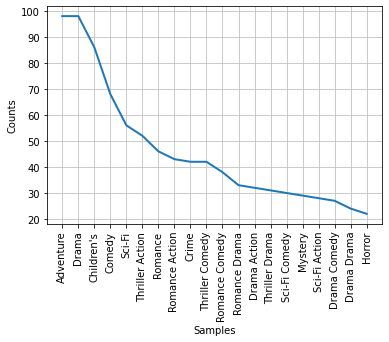

In [ ]:
freqq.plot(20, cumulative=False)

### 2.หนังประเภทไหนที่คนนิยม

In [ ]:
#2.ตอนนี้หนังประเภทไหนกำลังเป็นที่นิยม
#นับจำนวนครั้งในการเข้าดูหนัง
moviecount=pd.DataFrame(data.groupby(['MovieID','Title','Genres']).size())
moviecount['Count'] = moviecount
del moviecount[0]
moviecount.reset_index(inplace=True)
moviecount.sort_values('Count',ascending= False, inplace=True) 
moviecount

,MovieID,Title,Genres,Count
2651,2858,American Beauty (1999),Comedy|Drama,3428
253,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,2991
1106,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,2990
1120,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,2883
466,480,Jurassic Park (1993),Action|Adventure|Sci-Fi,2672
...,...,...,...,...
3013,3237,Kestrel's Eye (Falkens öga) (1998),Documentary,1
725,763,"Last of the High Kings, The (a.k.a. Summer Fli...",Drama,1
607,624,Condition Red (1995),Action|Drama|Thriller,1
2367,2563,Beauty (1998),Drama,1


In [ ]:
Genres = moviecount['Genres']
Genres

2651                           Comedy|Drama
253         Action|Adventure|Fantasy|Sci-Fi
1106      Action|Adventure|Drama|Sci-Fi|War
1120    Action|Adventure|Romance|Sci-Fi|War
466                 Action|Adventure|Sci-Fi
                       ...                 
3013                            Documentary
725                                   Drama
607                   Action|Drama|Thriller
2367                                  Drama
3064                                 Comedy
Name: Genres, Length: 3706, dtype: object

In [ ]:
Genres = " ".join([t for t in Genres ]) # change serier -> str
Genres.lower()

"comedy|drama action|adventure|fantasy|sci-fi action|adventure|drama|sci-fi|war action|adventure|romance|sci-fi|war action|adventure|sci-fi action|drama|war action|sci-fi|thriller action|sci-fi|thriller comedy|sci-fi drama|thriller action|adventure|comedy|sci-fi action|adventure crime|drama|thriller thriller action|drama|war comedy|romance action|adventure|comedy|romance drama|war crime|film-noir|mystery|thriller comedy|romance children's|drama|fantasy|sci-fi action|adventure|fantasy|sci-fi comedy drama action|crime|drama comedy|romance|war comedy|horror crime|drama action|sci-fi|thriller animation|children's|comedy action|horror|sci-fi|thriller action|adventure|sci-fi|thriller action|thriller action|drama action|sci-fi|thriller|war film-noir|sci-fi adventure|animation|film-noir adventure|comedy|drama crime|thriller children's|comedy|drama comedy action|sci-fi|war adventure|comedy|sci-fi drama adventure|children's|drama|musical drama|mystery|sci-fi|thriller action|adventure|sci-fi|thri

In [ ]:
Genres = [a for a in Genres.split('|')] 
Genres #split // tokken

['Comedy',
 'Drama Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi Action',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'War Action',
 'Adventure',
 'Romance',
 'Sci-Fi',
 'War Action',
 'Adventure',
 'Sci-Fi Action',
 'Drama',
 'War Action',
 'Sci-Fi',
 'Thriller Action',
 'Sci-Fi',
 'Thriller Comedy',
 'Sci-Fi Drama',
 'Thriller Action',
 'Adventure',
 'Comedy',
 'Sci-Fi Action',
 'Adventure Crime',
 'Drama',
 'Thriller Thriller Action',
 'Drama',
 'War Comedy',
 'Romance Action',
 'Adventure',
 'Comedy',
 'Romance Drama',
 'War Crime',
 'Film-Noir',
 'Mystery',
 'Thriller Comedy',
 "Romance Children's",
 'Drama',
 'Fantasy',
 'Sci-Fi Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi Comedy Drama Action',
 'Crime',
 'Drama Comedy',
 'Romance',
 'War Comedy',
 'Horror Crime',
 'Drama Action',
 'Sci-Fi',
 'Thriller Animation',
 "Children's",
 'Comedy Action',
 'Horror',
 'Sci-Fi',
 'Thriller Action',
 'Adventure',
 'Sci-Fi',
 'Thriller Action',
 'Thriller Action',
 'Drama Action',
 'Sci-Fi',
 'Thriller'

In [ ]:
freqp = nltk.FreqDist(Genres)
for key,val in freqp.items():
    print(str(key) + ':' + str(val))

Comedy:73
Drama Action:39
Adventure:103
Fantasy:21
Sci-Fi Action:24
Drama:115
Sci-Fi:60
War Action:29
Romance:51
Thriller Action:56
Thriller Comedy:66
Sci-Fi Drama:18
Adventure Crime:2
Thriller Thriller Action:2
War Comedy:20
Romance Action:50
Romance Drama:37
War Crime:5
Film-Noir:10
Mystery:31
Romance Children's:7
Sci-Fi Comedy Drama Action:1
Crime:45
Drama Comedy:38
Horror Crime:4
Thriller Animation:16
Children's:91
Comedy Action:8
Horror:24
Thriller:9
War Film-Noir:1
Sci-Fi Adventure:7
Animation:14
Film-Noir Adventure:1
Drama Crime:7
Thriller Children's:10
Drama Comedy Action:9
War Adventure:6
Sci-Fi Drama Adventure:3
Musical Drama:5
Horror Action:6
Drama Drama:29
Thriller Crime:10
Adventure Action:7
Drama Comedy Animation:3
Comedy Comedy:19
Romance Drama Drama:7
Romance Comedy:54
Mystery Comedy Action:1
Sci-Fi Comedy:27
Fantasy Comedy:8
Fantasy Drama:5
Romance Comedy Drama:8
Western Drama Action:2
Sci-Fi Comedy Comedy Action:1
Western Action:5
Romance Comedy Drama Drama:1
Sci-Fi C

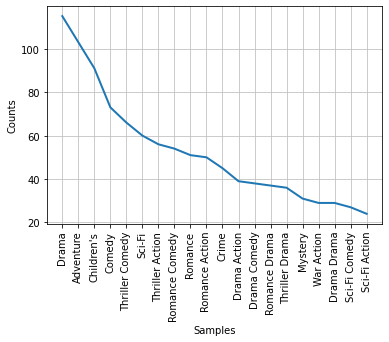

In [ ]:
freqp.plot(20, cumulative=False)

### 3. ผู้ชายนิยมหนังประเภทไหน

In [ ]:
#ผู้ชายนิยมหนังประเภทไหน
Gmoviecount=pd.DataFrame(data.groupby(['MovieID','Title','Genres','Gender']).size())
Gmoviecount['Count'] = Gmoviecount
del Gmoviecount[0]
Gmoviecount.reset_index(inplace=True)
Gmoviecount.sort_values('Count',ascending= False, inplace=True) 
Gmoviecount

,MovieID,Title,Genres,Gender,Count
5132,2858,American Beauty (1999),Comedy|Drama,M,2482
500,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,M,2344
2117,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,M,2342
2145,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,M,2230
1127,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,M,2193
...,...,...,...,...,...
6387,3542,Coming Apart (1969),Drama,M,1
6386,3542,Coming Apart (1969),Drama,F,1
4176,2358,Savior (1998),Drama,F,1
1328,717,Mouth to Mouth (Boca a boca) (1995),Comedy,M,1


#### # หนังเรื่องไหนที่ผู้ชายชอบมากที่สุด

In [ ]:
# หนังเรื่องไหนที่ผู้ชายชอบมากที่สุด
Gmoviecount= Gmoviecount[Gmoviecount['Gender'] == 'M']
Gmoviecount

,MovieID,Title,Genres,Gender,Count
5132,2858,American Beauty (1999),Comedy|Drama,M,2482
500,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,M,2344
2117,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,M,2342
2145,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,M,2230
1127,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,M,2193
...,...,...,...,...,...
1999,1118,Tashunga (1995),Adventure|Western,M,1
1321,712,Captives (1994),Drama,M,1
6387,3542,Coming Apart (1969),Drama,M,1
1328,717,Mouth to Mouth (Boca a boca) (1995),Comedy,M,1


In [ ]:
Genres_Gm = Gmoviecount['Genres']
Genres_Gm

5132                           Comedy|Drama
500         Action|Adventure|Fantasy|Sci-Fi
2117      Action|Adventure|Drama|Sci-Fi|War
2145    Action|Adventure|Romance|Sci-Fi|War
1127                 Action|Sci-Fi|Thriller
                       ...                 
1999                      Adventure|Western
1321                                  Drama
6387                                  Drama
1328                                 Comedy
1774                                  Drama
Name: Genres, Length: 3671, dtype: object

In [ ]:
Genres_Gm = " ".join([t for t in Genres_Gm ]) # change serier -> str
Genres_Gm.lower()

"comedy|drama action|adventure|fantasy|sci-fi action|adventure|drama|sci-fi|war action|adventure|romance|sci-fi|war action|sci-fi|thriller action|adventure|sci-fi action|drama|war action|sci-fi|thriller action|adventure|comedy|sci-fi comedy|sci-fi action|adventure action|drama|war drama|thriller crime|drama|thriller thriller action|adventure|fantasy|sci-fi action|crime|drama action|sci-fi|thriller crime|film-noir|mystery|thriller drama|war action|adventure|sci-fi|thriller action|adventure|comedy|romance action|horror|sci-fi|thriller comedy children's|drama|fantasy|sci-fi comedy|horror crime|drama comedy|romance drama comedy|romance action|thriller comedy|romance|war action|drama action|sci-fi|thriller|war film-noir|sci-fi animation|children's|comedy action|sci-fi|war action|adventure|sci-fi|thriller adventure|animation|film-noir action|horror drama|mystery|sci-fi|thriller crime|thriller action|thriller action|crime|drama adventure|comedy|sci-fi action|thriller comedy adventure|comedy|d

In [ ]:
Genres_Gm = [a for a in Genres_Gm.split('|')] 
Genres_Gm #split // tokken

['Comedy',
 'Drama Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi Action',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'War Action',
 'Adventure',
 'Romance',
 'Sci-Fi',
 'War Action',
 'Sci-Fi',
 'Thriller Action',
 'Adventure',
 'Sci-Fi Action',
 'Drama',
 'War Action',
 'Sci-Fi',
 'Thriller Action',
 'Adventure',
 'Comedy',
 'Sci-Fi Comedy',
 'Sci-Fi Action',
 'Adventure Action',
 'Drama',
 'War Drama',
 'Thriller Crime',
 'Drama',
 'Thriller Thriller Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi Action',
 'Crime',
 'Drama Action',
 'Sci-Fi',
 'Thriller Crime',
 'Film-Noir',
 'Mystery',
 'Thriller Drama',
 'War Action',
 'Adventure',
 'Sci-Fi',
 'Thriller Action',
 'Adventure',
 'Comedy',
 'Romance Action',
 'Horror',
 'Sci-Fi',
 "Thriller Comedy Children's",
 'Drama',
 'Fantasy',
 'Sci-Fi Comedy',
 'Horror Crime',
 'Drama Comedy',
 'Romance Drama Comedy',
 'Romance Action',
 'Thriller Comedy',
 'Romance',
 'War Action',
 'Drama Action',
 'Sci-Fi',
 'Thriller',
 'War Film-Noir',
 'Sci-Fi Animati

In [ ]:
freq = nltk.FreqDist(Genres_Gm)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

Comedy:73
Drama Action:31
Adventure:103
Fantasy:21
Sci-Fi Action:36
Drama:113
Sci-Fi:59
War Action:26
Romance:51
Thriller Action:70
Sci-Fi Comedy:27
Adventure Action:4
War Drama:6
Thriller Crime:12
Thriller Thriller Action:2
Crime:45
Film-Noir:10
Mystery:31
Thriller Drama:28
Romance Action:46
Horror:24
Thriller Comedy Children's:1
Horror Crime:1
Drama Comedy:45
Romance Drama Comedy:3
Thriller Comedy:46
Thriller:9
War Film-Noir:1
Sci-Fi Animation:7
Children's:91
Comedy Action:14
Thriller Adventure:13
Animation:14
Film-Noir Action:2
Horror Drama:5
Drama Adventure:11
Thriller Comedy Adventure:4
Drama Crime:8
Adventure Drama Comedy Action:1
Thriller Animation:14
Sci-Fi Drama:20
Sci-Fi Adventure:6
Musical Action:12
Mystery Children's:2
Drama Drama Drama:4
Drama Sci-Fi:1
Western Comedy:3
Fantasy Comedy:5
Drama Comedy Comedy:5
Fantasy Comedy Action:4
Sci-Fi Comedy Comedy Drama Adventure:1
Western Action:6
Sci-Fi Comedy Action:3
Musical Comedy:11
Romance Comedy Action:5
Romance Crime:12
Thrill

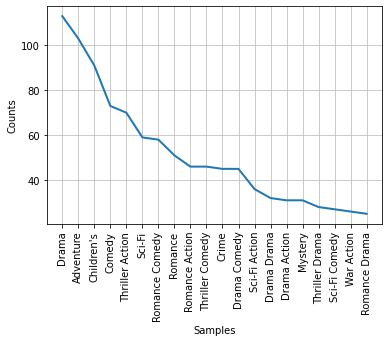

In [ ]:
freq.plot(20, cumulative=False)

### 4.ผู้หญิงนิยมหนังประเภทไหน

In [ ]:
#ผู้หญิงนิยมหนังประเภทไหน
Gmoviecount=pd.DataFrame(data.groupby(['MovieID','Title','Genres','Gender']).size())
Gmoviecount['Count'] = Gmoviecount
del Gmoviecount[0]
Gmoviecount.reset_index(inplace=True)
Gmoviecount.sort_values('Count',ascending= False, inplace=True) 
Gmoviecount

,MovieID,Title,Genres,Gender,Count
5132,2858,American Beauty (1999),Comedy|Drama,M,2482
500,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,M,2344
2117,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,M,2342
2145,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,M,2230
1127,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,M,2193
...,...,...,...,...,...
6387,3542,Coming Apart (1969),Drama,M,1
6386,3542,Coming Apart (1969),Drama,F,1
4176,2358,Savior (1998),Drama,F,1
1328,717,Mouth to Mouth (Boca a boca) (1995),Comedy,M,1


In [ ]:
# หนังเรื่องไหนที่ผู้หญิงชอบมากที่สุด
FGmoviecount = Gmoviecount[Gmoviecount['Gender'] == 'F']
FGmoviecount

,MovieID,Title,Genres,Gender,Count
5131,2858,American Beauty (1999),Comedy|Drama,F,946
4252,2396,Shakespeare in Love (1998),Comedy|Romance,F,798
1133,593,"Silence of the Lambs, The (1991)",Drama|Thriller,F,706
4946,2762,"Sixth Sense, The (1999)",Thriller,F,664
2250,1265,Groundhog Day (1993),Comedy|Romance,F,658
...,...,...,...,...,...
6422,3563,"Crow: Salvation, The (2000)",Action|Horror,F,1
4160,2350,Heart Condition (1990),Comedy,F,1
1320,712,Captives (1994),Drama,F,1
6386,3542,Coming Apart (1969),Drama,F,1


In [ ]:
Genres_Fm = FGmoviecount['Genres']
Genres_Fm

5131      Comedy|Drama
4252    Comedy|Romance
1133    Drama|Thriller
4946          Thriller
2250    Comedy|Romance
             ...      
6422     Action|Horror
4160            Comedy
1320             Drama
6386             Drama
4176             Drama
Name: Genres, Length: 3481, dtype: object

In [ ]:
Genres_Fm = " ".join([t for t in Genres_Fm ]) # change serier -> str
Genres_Fm.lower()

"comedy|drama comedy|romance drama|thriller thriller comedy|romance crime|drama|thriller action|adventure|romance|sci-fi|war action|adventure|drama|sci-fi|war action|adventure|fantasy|sci-fi comedy|romance|war comedy|sci-fi action|adventure|comedy|romance drama drama|war children's|drama|fantasy|sci-fi animation|children's|comedy children's|comedy|drama action|drama|war action|adventure|sci-fi action|adventure comedy crime|film-noir|mystery|thriller action|drama|war crime|drama action|adventure|comedy|sci-fi comedy|horror action|sci-fi|thriller adventure|children's|drama|musical drama|romance|war comedy|romance drama|romance action|crime|drama comedy|romance comedy|romance drama|romance animation|children's|comedy action|adventure|fantasy|sci-fi drama action|sci-fi|thriller comedy|drama adventure|comedy|drama drama|romance drama drama|romance|war action|thriller animation|children's|comedy animation|children's|comedy|musical drama drama|romance comedy|drama drama|mystery|thriller actio

In [ ]:
Genres_Fm = [a for a in Genres_Fm.split('|')] 
Genres_Fm #split // tokken

['Comedy',
 'Drama Comedy',
 'Romance Drama',
 'Thriller Thriller Comedy',
 'Romance Crime',
 'Drama',
 'Thriller Action',
 'Adventure',
 'Romance',
 'Sci-Fi',
 'War Action',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'War Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi Comedy',
 'Romance',
 'War Comedy',
 'Sci-Fi Action',
 'Adventure',
 'Comedy',
 'Romance Drama Drama',
 "War Children's",
 'Drama',
 'Fantasy',
 'Sci-Fi Animation',
 "Children's",
 "Comedy Children's",
 'Comedy',
 'Drama Action',
 'Drama',
 'War Action',
 'Adventure',
 'Sci-Fi Action',
 'Adventure Comedy Crime',
 'Film-Noir',
 'Mystery',
 'Thriller Action',
 'Drama',
 'War Crime',
 'Drama Action',
 'Adventure',
 'Comedy',
 'Sci-Fi Comedy',
 'Horror Action',
 'Sci-Fi',
 'Thriller Adventure',
 "Children's",
 'Drama',
 'Musical Drama',
 'Romance',
 'War Comedy',
 'Romance Drama',
 'Romance Action',
 'Crime',
 'Drama Comedy',
 'Romance Comedy',
 'Romance Drama',
 'Romance Animation',
 "Children's",
 'Comedy Action',
 'Adventure',
 'Fa

In [ ]:
freqf = nltk.FreqDist(Genres_Fm)
for key,val in freqf.items():
    print(str(key) + ':' + str(val))

Comedy:72
Drama Comedy:38
Romance Drama:32
Thriller Thriller Comedy:3
Romance Crime:14
Drama:111
Thriller Action:50
Adventure:103
Romance:51
Sci-Fi:60
War Action:12
Fantasy:21
Sci-Fi Comedy:30
War Comedy:17
Sci-Fi Action:29
Romance Drama Drama:12
War Children's:4
Sci-Fi Animation:1
Children's:91
Comedy Children's:4
Drama Action:44
Adventure Comedy Crime:1
Film-Noir:10
Mystery:31
War Crime:8
Horror Action:5
Thriller Adventure:14
Musical Drama:8
Romance Action:40
Crime:44
Romance Comedy:49
Romance Animation:21
Comedy Action:17
Sci-Fi Drama Action:4
Thriller Comedy:64
Drama Adventure:11
Drama Drama:24
Thriller Animation:14
Comedy Animation:2
Musical Drama Drama:2
Animation:14
Film-Noir Crime:1
Thriller Comedy Action:12
War Comedy Comedy:2
Romance Adventure:17
Fantasy Comedy Comedy Comedy:1
Romance Comedy Drama:9
Musical:15
Fantasy Action:7
Drama Comedy Animation:1
Comedy Drama Animation:2
Musical Adventure:2
Western Crime:1
Drama Children's:7
Musical Comedy Comedy:1
War Comedy Action:2
Ho

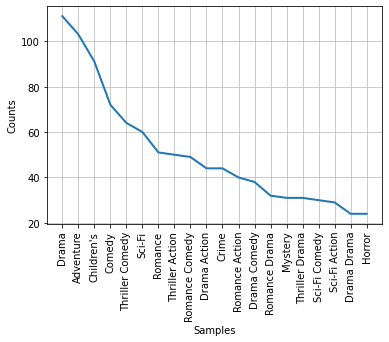

In [ ]:
freqf.plot(20, cumulative=False)

# Done!

** What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables 
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
** How to submit: **

        ส่ง link ของ ipynb และ slides ใน Google Classroom
